## Regressão de cristas ou cumeeira para superar falhas na regressão linear

Este é útil quando um conjunto de dados tem vetores colineares.

> Regressão de cristas é muito boa na presença de colinearidade que possa ser modelada em características polinomiais: vetores $x,x^2,x^3,...,x^n$ que saõ altamente colineares e correlacionados

1. Usar `make_regression`para criar conjunto de dados simples com três fatores de previsão, e `effective_rank` = 2. Effective rank significa que, que a matriz é de ordem completa, muitas das colunas têm alto grau de colinearidade

In [1]:
from sklearn.datasets import make_regression
reg_data, reg_target = make_regression(n_samples=2000, n_features=3, effective_rank=2, noise=10)

2. Ver a regressão linear com boostrapping

In [2]:
import numpy as np
n_boostrap = 1000
len_data = len(reg_data)
subsample_size = np.int64(0.5 * len_data)
subsample = lambda:np.random.choice(np.arange(0,len_data), size=subsample_size)

In [3]:
coefs = np.ones((n_boostrap,3))

In [4]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [5]:
for i in range(n_boostrap):
    subsample_idx = subsample()
    subsample_X = reg_data[subsample_idx]
    subsample_y = reg_target[subsample_idx]
    lr.fit(subsample_X, subsample_y)
    coefs[i][0] = lr.coef_[0]
    coefs[i][1] = lr.coef_[1]
    coefs[i][2] = lr.coef_[2]

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

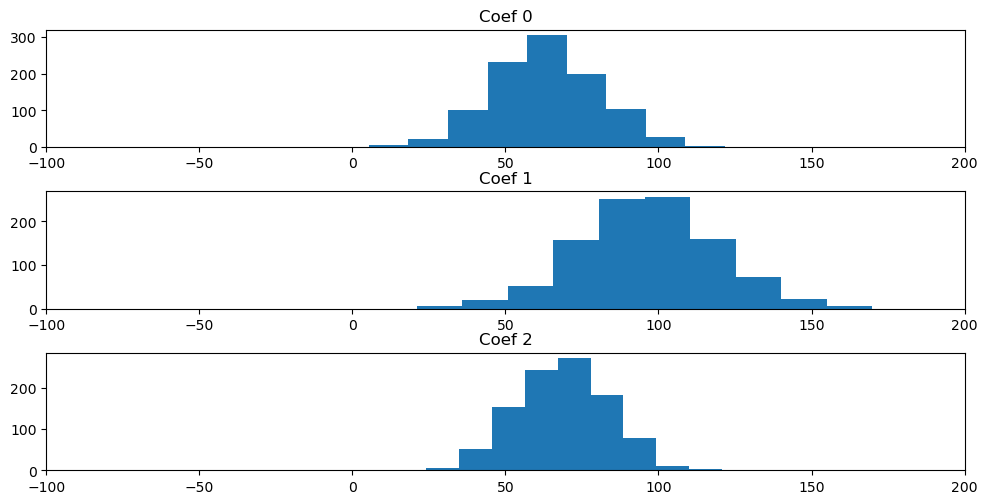

In [7]:
f, ax = plt.subplots(figsize=(10,5), nrows=3)
f.tight_layout()
min, max = -100, 200
ax[0].hist(coefs[:,0], bins=10)
ax[0].set_title("Coef 0")
ax[0].set_xlim(min, max)

ax[1].hist(coefs[:,1], bins=10)
ax[1].set_title("Coef 1")
ax[1].set_xlim(min, max)

ax[2].hist(coefs[:,2], bins=10)
ax[2].set_title("Coef 2")
ax[2].set_xlim(min, max)
plt.show()

4. Faça a mesmo processo com a regressão de cristas

In [8]:
from sklearn.linear_model import Ridge

In [9]:
r = Ridge()
n_bootstraps = 1000
len_data = len(reg_data)
subsample_size = np.int64(0.5 * len_data)
subsample = lambda:np.random.choice(np.arange(0,len_data), size=subsample_size)

In [10]:
coefs_r = np.ones((n_bootstraps, 3))
for i in  range(n_bootstraps):
    subsample_idx = subsample()
    subsample_X = reg_data[subsample_idx]
    subsample_y = reg_target[subsample_idx]
    r.fit(subsample_X, subsample_y)
    coefs_r[i][0] = r.coef_[0]
    coefs_r[i][1] = r.coef_[1]
    coefs_r[i][2] = r.coef_[2]

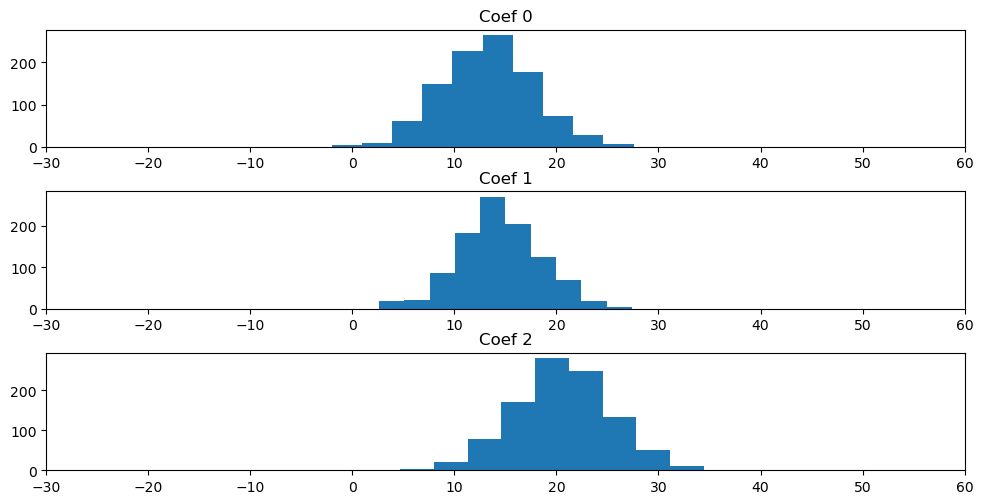

In [11]:
f, ax = plt.subplots(figsize=(10,5), nrows=3)
f.tight_layout()
min, max = -30,60
ax[0].hist(coefs_r[:,0], bins=10)
ax[0].set_title("Coef 0")
ax[0].set_xlim(min, max)

ax[1].hist(coefs_r[:,1], bins=10)
ax[1].set_title("Coef 1")
ax[1].set_xlim(min, max)

ax[2].hist(coefs_r[:,2], bins=10)
ax[2].set_title("Coef 2")
ax[2].set_xlim(min, max)
plt.show()

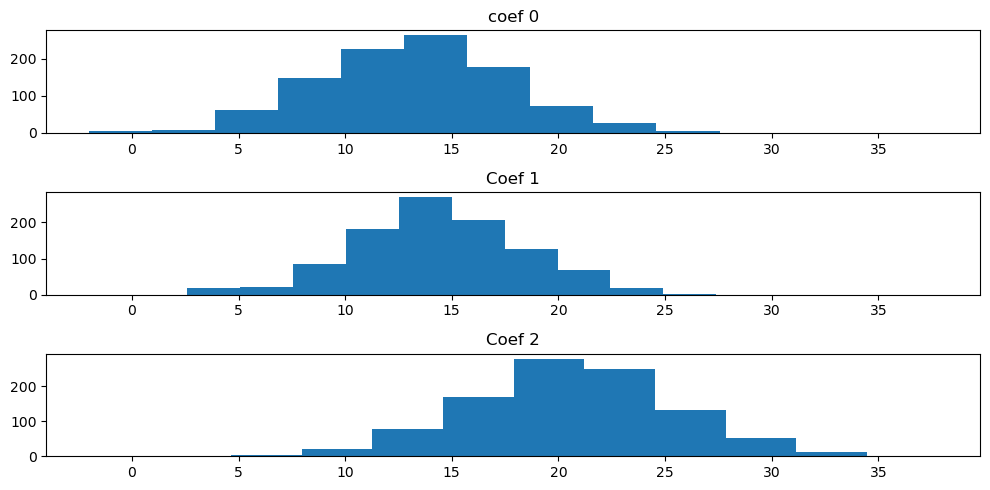

In [12]:
# outra forma de plotar gráficos, mas chega no mesmo resultado
plt.figure(figsize=(10,5))
ax1 = plt.subplot(311, title="coef 0")
ax1.hist(coefs_r[:,0])


ax2 = plt.subplot(312, sharex=ax1, title="Coef 1")
ax2.hist(coefs_r[:,1])

ax3 = plt.subplot(313, sharex=ax1, title= "Coef 2")
ax3.hist(coefs_r[:,2])

plt.tight_layout()
plt.show()

Agora os coeficientes fazendo a regressão de cristas, estão mais próximos de zero.

5. Veja a disperção média entre os coeficientes na regressão linear

In [13]:
np.var(coefs, axis=0)

array([299.98865301, 496.07973628, 217.93199381])

6. veja a disperção média entre os coeficientes na regressão de cristas

In [14]:
np.var(coefs_r, axis=0)

array([19.76382064, 15.53790892, 21.98747484])

## Otimizando a regressão de cristas

Atravéz de validação cruzada, será afinado o parâmetro alpha da regressão de cumeeira, no scikit-learn o parâmetro gamma é representado por alpha ao usar `RidgeRegression`

In [15]:
from sklearn.datasets import make_regression

In [16]:
reg_data, reg_target = make_regression(n_samples=100, n_features=2, effective_rank=1, noise=10)

## Como fazer

No módulo `linear_models`, há um objeto chamado de `RidgeCV` (Ridge cross-validation), desempenha um validação similar ao leave-one-out cross-validation (LOOCV)

1. este irá treinar o modelo para todoso os exemplos, exceto um. 

In [17]:
from sklearn.linear_model import RidgeCV

In [18]:
rcv = RidgeCV(alphas=np.array([.1,.2,.3,.4]))
rcv.fit(reg_data, reg_target)

RidgeCV(alphas=array([0.1, 0.2, 0.3, 0.4]))

2. Depois de ajustar a regressão, o atributo alphas será o a melhor escolha

In [19]:
rcv.alpha_

0.1

3. mudando um pouco o alphas por volta de .1

In [20]:
rcv2 = RidgeCV(alphas=np.array([.07,.08,.09,.1,.11]))

In [21]:
rcv2.fit(reg_data, reg_target)

RidgeCV(alphas=array([0.07, 0.08, 0.09, 0.1 , 0.11]))

In [22]:
rcv2.alpha_

0.07

## Como funciona

Pode-se forçar o `RidgeCV` para armazenar os valores da validação cruzada...

In [23]:
alphas_to_test = np.linspace(0.01,1)
rcv3 = RidgeCV(alphas=alphas_to_test, store_cv_values=True)

In [24]:
rcv3.fit(reg_data, reg_target)

RidgeCV(alphas=array([0.01      , 0.03020408, 0.05040816, 0.07061224, 0.09081633,
       0.11102041, 0.13122449, 0.15142857, 0.17163265, 0.19183673,
       0.21204082, 0.2322449 , 0.25244898, 0.27265306, 0.29285714,
       0.31306122, 0.33326531, 0.35346939, 0.37367347, 0.39387755,
       0.41408163, 0.43428571, 0.4544898 , 0.47469388, 0.49489796,
       0.51510204, 0.53530612, 0.5555102 , 0.57571429, 0.59591837,
       0.61612245, 0.63632653, 0.65653061, 0.67673469, 0.69693878,
       0.71714286, 0.73734694, 0.75755102, 0.7777551 , 0.79795918,
       0.81816327, 0.83836735, 0.85857143, 0.87877551, 0.89897959,
       0.91918367, 0.93938776, 0.95959184, 0.97979592, 1.        ]),
        store_cv_values=True)

Forom testados varios pontos, entre $0.01$ e $1$, desde que deixamos ativado o `store_cv_values`

In [26]:
rcv3.cv_values_.shape

(100, 50)

Então tem 100 valores na regressão inicial e 50 valores alfa testados. Temos acesso para todos os erros dos 50 valores. Então podemos encontrar o menor erro possível, e escolher este como o alfa.

In [34]:
menor_erro = rcv3.cv_values_.mean(axis=0).argmin()

In [35]:
alphas_to_test[menor_erro]

0.07061224489795918

o que corresponde ao melhor valor encontrado no `rcv3` da classe RidgeCV

In [37]:
rcv3.alpha_

0.07061224489795918

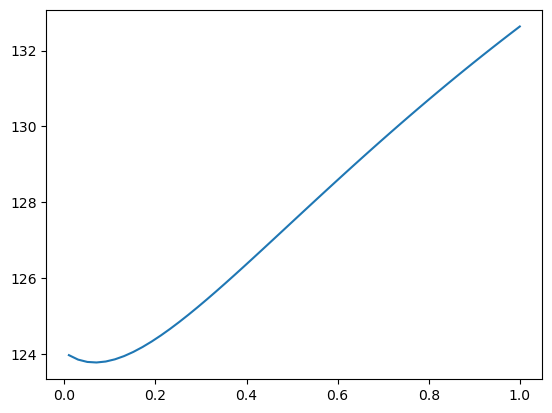

In [39]:
# visualizando
plt.plot(alphas_to_test, rcv3.cv_values_.mean(axis=0))
plt.show()

## Mais

podemos usar uma função propria, para isso, primeiro tem que definir a função de perca. importando do sklearn.metrics

In [40]:
from sklearn.metrics import mean_absolute_error

também é possível usar a função `make_scorer`para padronizar a função para poder usar no scikit.

In [41]:
from sklearn.metrics import make_scorer
MAD_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

continuar até encontrar o menor valor negativo MAD

In [42]:
rcv4 = RidgeCV(alphas=alphas_to_test, store_cv_values=True, scoring=MAD_scorer)

In [43]:
rcv4.fit(reg_data, reg_target)

RidgeCV(alphas=array([0.01      , 0.03020408, 0.05040816, 0.07061224, 0.09081633,
       0.11102041, 0.13122449, 0.15142857, 0.17163265, 0.19183673,
       0.21204082, 0.2322449 , 0.25244898, 0.27265306, 0.29285714,
       0.31306122, 0.33326531, 0.35346939, 0.37367347, 0.39387755,
       0.41408163, 0.43428571, 0.4544898 , 0.47469388, 0.49489796,
       0.51510204, 0.53530612, 0.5555102 , 0.57571429, 0.59591837,
       0.61612245, 0.63632653, 0.65653061, 0.67673469, 0.69693878,
       0.71714286, 0.73734694, 0.75755102, 0.7777551 , 0.79795918,
       0.81816327, 0.83836735, 0.85857143, 0.87877551, 0.89897959,
       0.91918367, 0.93938776, 0.95959184, 0.97979592, 1.        ]),
        scoring=make_scorer(mean_absolute_error, greater_is_better=False, response_method='predict'),
        store_cv_values=True)

In [45]:
menor_idx = rcv4.cv_values_.mean(axis=0).argmin()

In [46]:
rcv4.cv_values_.mean(axis=0)[menor_idx]

-0.013523192662592028

In [47]:
alphas_to_test[menor_idx]

0.01

## Regressão Bayesiana

In [48]:
X = np.linspace(0,5)
y_truth = 3 * X
y_noise = np.random.normal(0,0.5,len(y_truth)) #distribuição normal do ruído com média zero
y_noisy = (y_truth + y_noise)

In [54]:
X.shape

(50,)

Precisam ser remodeladas (reshaped)

In [55]:
from sklearn.linear_model import BayesianRidge
br_inst = BayesianRidge().fit(X.reshape(-1,1), y_noisy)

Escreva o seguinte para obter estimativas de erro na regressão linear regular

In [56]:
y_pred, y_err = br_inst.predict(X.reshape(-1,1), return_std=True)

Plotar os resultados

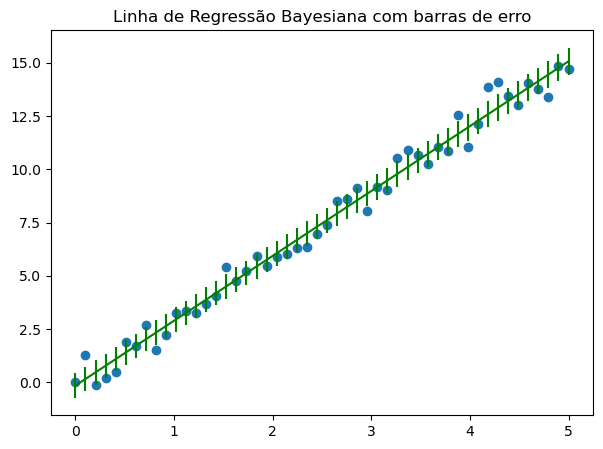

In [57]:
plt.figure(figsize=(7,5))
plt.scatter(X, y_noisy)
plt.title("Linha de Regressão Bayesiana com barras de erro")
plt.errorbar(X, y_pred, y_err, color="green")
plt.show()